In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
voisins = [(+1, 0),
           (-1, 0),
           (0, +1), 
           (0, -1)]

In [3]:
def topple(z):
    a = np.copy(z)
    k = 0
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):

            if z[i, j] > 5:
                k += 1
                a[i, j] -= 4

                for vh, vv in voisins:
                    if i+vv < 0 or i+vv >= a.shape[0]:
                        continue
                    if j+vh < 0 or j+vh >= a.shape[1]:
                        continue    
                    
                    a[i+vv, j+vh] += 1
                    
    return a, k

In [4]:
def stabilize(z):
    
    for nbr_iter in range(10000):
        z, k = topple(z)
        if k == 0:
            break
    else:
        print('not stable yet')
    
    return z, nbr_iter

99


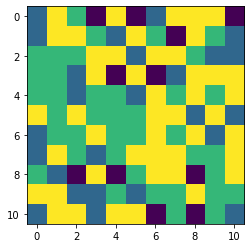

In [5]:
n = 11

z0 = np.random.randint(5, 16, (n, n))
z0, nbr_iter = stabilize(z0)
plt.imshow(z0);
print(nbr_iter)

In [6]:
# k map - avalanche size for each starting cell
kmap = np.zeros_like(z0)
for i in range(z0.shape[0]):
    for j in range(z0.shape[1]):
        a = np.copy(z0)
        a[i, j] += 1
        a1, nbr_iter = stabilize(a)
        kmap[i, j] = nbr_iter

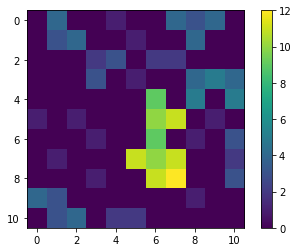

In [7]:
plt.imshow(kmap); plt.colorbar();

In [8]:
ij_max = np.unravel_index(np.argmax(kmap), kmap.shape)
print(ij_max)

(8, 7)


In [9]:
from collections import defaultdict

In [10]:
z = np.copy(z0)
z[ij_max] += 1

topple_events = defaultdict(list)
acc_events = defaultdict(list)

for nbr_iter in range(100):
    a = np.copy(z)
    k = 0
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):

            if z[i, j] > 5:
                #print(nbr_iter, (i, j))
                topple_events[(nbr_iter, i, j)] = acc_events[(i, j)]
                acc_events[(i, j)] = []
                k += 1
                a[i, j] -= 4

                for vh, vv in voisins:
                    if i+vv < 0 or i+vv >= a.shape[0]:
                        continue
                    if j+vh < 0 or j+vh >= a.shape[1]:
                        continue  
                    
                    a[i+vv, j+vh] += 1
                    acc_events[(i+vv, j+vh)].append((nbr_iter, i, j))

    if k == 0:
        break
    z = np.copy(a)

In [11]:
topple_events

defaultdict(list,
            {(0, 8, 7): [],
             (1, 7, 7): [(0, 8, 7)],
             (1, 8, 6): [(0, 8, 7)],
             (2, 7, 6): [(1, 7, 7), (1, 8, 6)],
             (3, 6, 6): [(2, 7, 6)],
             (3, 7, 5): [(2, 7, 6)],
             (4, 5, 6): [(3, 6, 6)],
             (4, 6, 5): [(3, 6, 6), (3, 7, 5)],
             (4, 6, 7): [(1, 7, 7), (3, 6, 6)],
             (4, 8, 5): [(1, 8, 6), (3, 7, 5)],
             (5, 4, 6): [(4, 5, 6)],
             (5, 5, 5): [(4, 5, 6), (4, 6, 5)],
             (5, 5, 7): [(4, 5, 6), (4, 6, 7)],
             (5, 6, 8): [(4, 6, 7)],
             (6, 4, 7): [(5, 4, 6), (5, 5, 7)],
             (6, 7, 8): [(1, 7, 7), (5, 6, 8)],
             (7, 4, 8): [(6, 4, 7)],
             (8, 3, 8): [(7, 4, 8)],
             (8, 5, 8): [(5, 5, 7), (5, 6, 8), (7, 4, 8)],
             (9, 3, 9): [(8, 3, 8)],
             (9, 5, 9): [(8, 5, 8)],
             (10, 3, 10): [(9, 3, 9)],
             (10, 4, 9): [(7, 4, 8), (9, 3, 9), (9, 5, 9)],
     

In [12]:
def label(event):
    return f'{event[0]}({event[1]} {event[2]})'

In [13]:
from graphviz import Digraph

In [14]:
g = Digraph(format='png')


for tgt, sources in topple_events.items():
    for src in sources:
        g.edge(label(src), label(tgt))

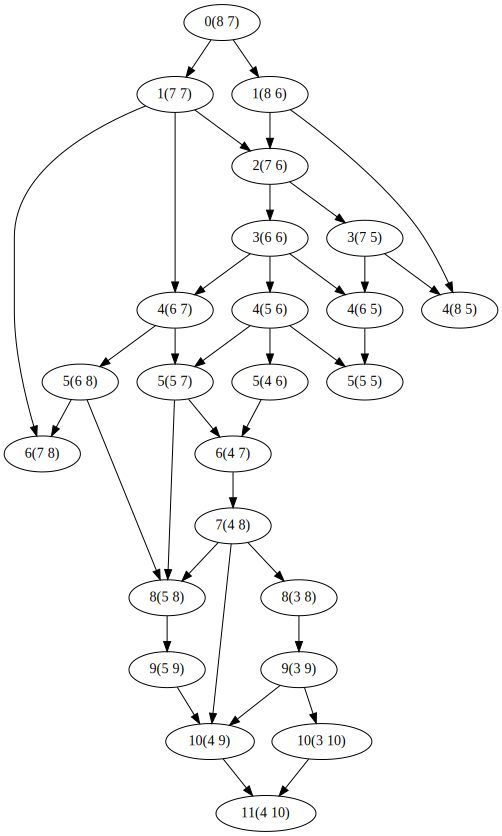

In [15]:
g

    note: there is a possible indetermination
    for instance
    a cell at critical height 3
    and all 4 neighbours fall simultaneously
    As only one trigger the topple,
    which one is responsible ?     

--> try cairo + hilbert curve!